In [34]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Eigenfaces

In dieser Übung betrachten wir das Problem der Gesichtserklärung mit Eigenfaces.



## Laden Sie die lfw_people-Daten aus sklearn 

- from sklearn.datasets import fetch_lfw_people
- Nutzen sie Personen, bei denen mindestens 100 Bilder pro Person vorhanden sind
- Splitten Sie die Daten in train & test




In [35]:
from sklearn.datasets import fetch_lfw_people

In [5]:
lfw_people = fetch_lfw_people(min_faces_per_person=100, resize=0.4)
X = lfw_people.data
y= lfw_people.target
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.25, random_state=42)

In [6]:
scaler=StandardScaler()
Xtrain=scaler.fit_transform(Xtrain)
Xtest=scaler.fit_transform(Xtest)

- Berechnen sie die ersten 100 PCA-Komponenten
- Plotten sie das mittlere Gesicht, Sowie die Eigenfaces

In [12]:
n_components = 100
n_samples, h, w = lfw_people.images.shape
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(Xtrain)

eigenfaces=pca.components_.reshape((n_components, h, w))
Xtrain_pca = pca.transform(Xtrain)
Xtest_pca=pca.transform(Xtest)


In [13]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


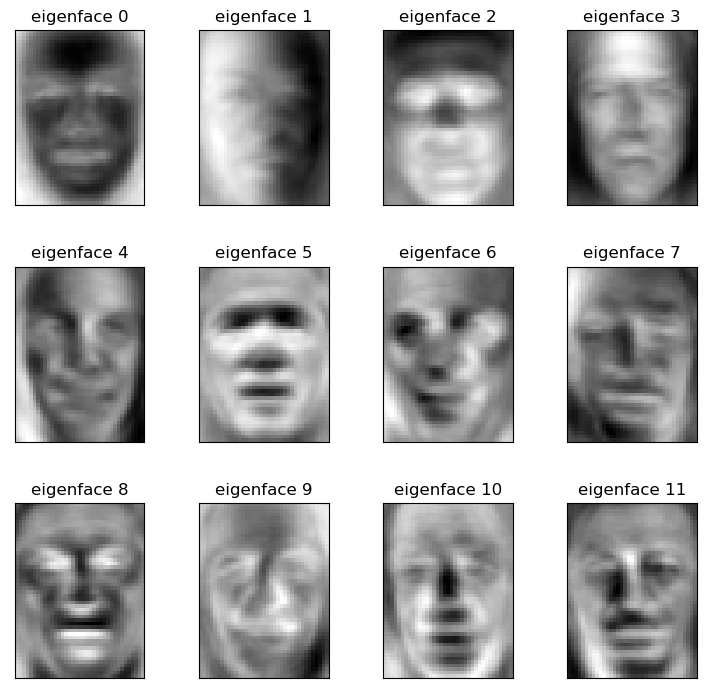

In [15]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces,eigenface_titles, h, w)

Erstellen sie eine SupportvektorMaschine zur Gesichtserkennung

In [25]:
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}
clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)
clf = clf.fit(Xtrain_pca, ytrain)
ypred = clf.predict(Xtest_pca)

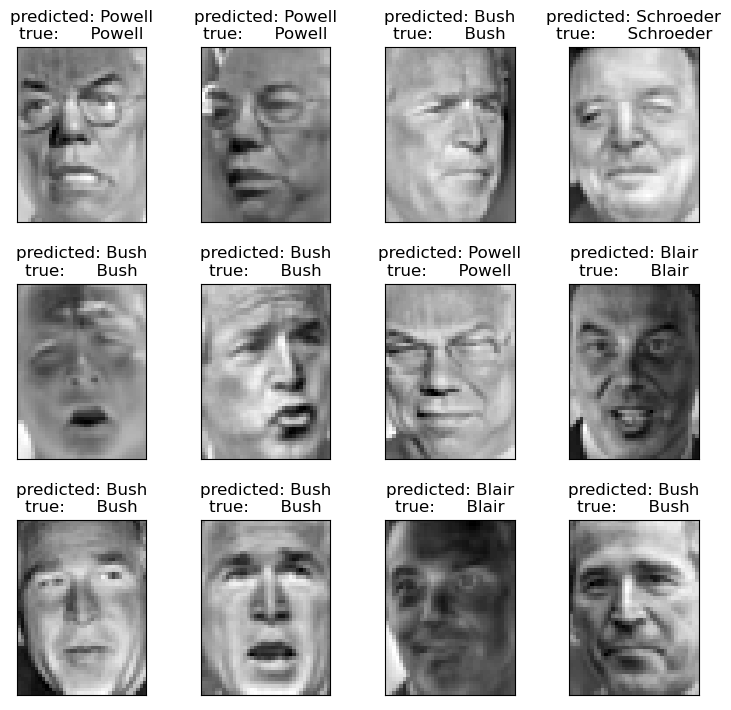

In [30]:
target_names = lfw_people.target_names
def title(y_pred, ytest, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(" ", 1)[-1]
    true_name = target_names[ytest[i]].rsplit(" ", 1)[-1]
    return "predicted: %s\ntrue:      %s" % (pred_name, true_name)


prediction_titles = [
    title(ypred, ytest, target_names, i) for i in range(ypred.shape[0])
]

plot_gallery(Xtest, prediction_titles, h, w)

Erstellen sie ein Neuronales Netz zur Gesichtserkennung mit Eigenfaces

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical

In [54]:
model = Sequential()
model.add(Dense(64, input_dim=100, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(5, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

model.fit(Xtrain_pca, to_categorical(ytrain), epochs=10)

Epoch 1/10
27/27 [==============================] - 1s 1ms/step - loss: 1.4311 - accuracy: 0.4713
Epoch 2/10
27/27 [==============================] - 0s 1ms/step - loss: 1.4113 - accuracy: 0.4713
Epoch 3/10
27/27 [==============================] - 0s 1ms/step - loss: 1.4056 - accuracy: 0.4713
Epoch 4/10
27/27 [==============================] - 0s 1ms/step - loss: 1.4030 - accuracy: 0.4713
Epoch 5/10
27/27 [==============================] - 0s 1ms/step - loss: 1.4016 - accuracy: 0.4713
Epoch 6/10
27/27 [==============================] - 0s 1ms/step - loss: 1.4015 - accuracy: 0.4713
Epoch 7/10
27/27 [==============================] - 0s 1ms/step - loss: 1.4008 - accuracy: 0.4713
Epoch 8/10
27/27 [==============================] - 0s 1ms/step - loss: 1.4007 - accuracy: 0.4713
Epoch 9/10
27/27 [==============================] - 0s 1ms/step - loss: 1.4003 - accuracy: 0.4713
Epoch 10/10
27/27 [==============================] - 0s 1ms/step - loss: 1.4005 - accuracy: 0.4713


Epoch 1/5


ValueError: in user code:

    File "C:\Users\ABleicher\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\ABleicher\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ABleicher\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\ABleicher\anaconda3\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\ABleicher\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\ABleicher\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 50, 37, 100), found shape=(None, 100)
